# Sun Chuanneng.
I adopted two different methods. One is weighted Word2Vec and the other is Doc2vecv

## 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('./data/fake_or_real_news.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
Unnamed: 0       6335 non-null int64
title            6335 non-null object
text             6335 non-null object
label            6335 non-null object
title_vectors    6335 non-null object
dtypes: int64(1), object(4)
memory usage: 247.5+ KB


In [15]:
data.head()

,Unnamed: 0,title,text,label,title_vectors
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,[ 1.1533764e-02 4.2144405e-03 1.9692603e-02 ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,[ 0.11267698 0.02518966 -0.00212591 0.021095...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,[ 0.04253004 0.04300297 0.01848392 0.048672...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,[ 0.10801624 0.11583211 0.02874823 0.061732...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,[ 1.69016439e-02 7.13498285e-03 -7.81233795e-...


In [3]:
data.drop('Unnamed: 0', inplace=True, axis=1)
data.head()

,title,text,label,title_vectors
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,[ 1.1533764e-02 4.2144405e-03 1.9692603e-02 ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,[ 0.11267698 0.02518966 -0.00212591 0.021095...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,[ 0.04253004 0.04300297 0.01848392 0.048672...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,[ 0.10801624 0.11583211 0.02874823 0.061732...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,[ 1.69016439e-02 7.13498285e-03 -7.81233795e-...


In [25]:
data['label']

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
5       FAKE
6       FAKE
7       REAL
8       REAL
9       REAL
10      REAL
11      REAL
12      FAKE
13      FAKE
14      REAL
15      REAL
16      FAKE
17      FAKE
18      REAL
19      REAL
20      REAL
21      FAKE
22      REAL
23      REAL
24      FAKE
25      REAL
26      REAL
27      REAL
28      REAL
29      FAKE
        ... 
6305    FAKE
6306    FAKE
6307    FAKE
6308    FAKE
6309    REAL
6310    REAL
6311    REAL
6312    FAKE
6313    FAKE
6314    FAKE
6315    REAL
6316    REAL
6317    FAKE
6318    FAKE
6319    REAL
6320    FAKE
6321    FAKE
6322    FAKE
6323    REAL
6324    REAL
6325    FAKE
6326    FAKE
6327    REAL
6328    FAKE
6329    FAKE
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

So there is only two labels, and we can replace REAL with 0, and FAKE with 1

In [4]:
data['label'] = data['label'].replace(['FAKE', 'REAL'], [1, 0])
data['label']

0       1
1       1
2       0
3       1
4       0
5       1
6       1
7       0
8       0
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      1
       ..
6305    1
6306    1
6307    1
6308    1
6309    0
6310    0
6311    0
6312    1
6313    1
6314    1
6315    0
6316    0
6317    1
6318    1
6319    0
6320    1
6321    1
6322    1
6323    0
6324    0
6325    1
6326    1
6327    0
6328    1
6329    1
6330    0
6331    1
6332    1
6333    0
6334    0
Name: label, Length: 6335, dtype: int64

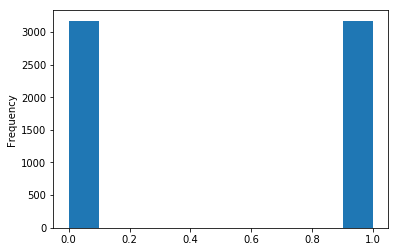

In [27]:
data['label'].plot('hist')

It's a balanced dataset

## 2. Use sum of TF-IDF weighted WordVecs to represent a document

![](Algo_explanation/1.png)

### 2.1 Data Preprocessing

In [ ]:
from nltk.corpus import stopwords
import nltk
import re

# remove puctionations
pat = re.compile('[0-9a-zA-Z ]')

stop_words = stopwords.words('english')

# Clear punctuation
cleaner = lambda string: ''.join([char.lower() for char in string if re.match(pat, char) is not None])
# Tokenization
tokenizer = lambda str_list: [nltk.word_tokenize(cleaner(string)) for string in str_list]
# Filter out stopwords
stopwords_cleaner = lambda x: [[word for word in word_list if word not in stop_words] for word_list in x]

tokenized_title = tokenizer(data.title)
tokenized_text = tokenizer(data.text)
cleaned_title = stopwords_cleaner(tokenized_title)
cleaned_text = stopwords_cleaner(tokenized_text)

In [7]:
import json
## Save for reuse
# cleaned_df = {
#     'title': cleaned_title,
#     'text': cleaned_text
# }
with open('./model/cleaned_df.json', 'r', encoding='utf8') as f:
    cleaned_df = json.loads(f.read())

In [8]:
cleaned_df = pd.DataFrame(cleaned_df)
cleaned_df.head()

,text,title
0,"[daniel, greenfield, shillman, journalism, fel...","[smell, hillarys, fear]"
1,"[google, pinterest, digg, linkedin, reddit, st...","[watch, exact, moment, paul, ryan, committed, ..."
2,"[us, secretary, state, john, f, kerry, said, m...","[kerry, go, paris, gesture, sympathy]"
3,"[kaydee, king, kaydeeking, november, 9, 2016, ...","[bernie, supporters, twitter, erupt, anger, dn..."
4,"[primary, day, new, york, frontrunners, hillar...","[battle, new, york, primary, matters]"


### 2.2 Train WordVecs for titles and texts, respectively

In [9]:
from gensim import models
seed = 10

D:\Anaconda3_501\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#### 1) Titles

In [10]:
wv_title = models.Word2Vec(cleaned_df['title'], size=100, window=5, min_count=1, seed=seed)

In [7]:
wv_title.most_similar(positive=['bad'])

D:\Anaconda3_501\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('people', 0.8612103462219238),
 ('obama', 0.8563690185546875),
 ('america', 0.8563374280929565),
 ('could', 0.8544567823410034),
 ('federal', 0.8537775278091431),
 ('debate', 0.8530303239822388),
 ('says', 0.8529757261276245),
 ('us', 0.8528727293014526),
 ('clinton', 0.8524423241615295),
 ('party', 0.8523204922676086)]

#### 2) Texts

In [11]:
wv_text = models.Word2Vec(cleaned_df['text'], size=200, window=8, min_count=1, seed=seed)

In [12]:
wv_text.most_similar(positive=['bad'])

D:\Anaconda3_501\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('good', 0.8793075084686279),
 ('really', 0.8541451096534729),
 ('obviously', 0.8468286991119385),
 ('nobody', 0.8451259732246399),
 ('yes', 0.8438848853111267),
 ('exactly', 0.84083092212677),
 ('stupid', 0.8322643637657166),
 ('cares', 0.827016294002533),
 ('pretty', 0.8252819776535034),
 ('happy', 0.8228706121444702)]

#### 3) Use MDS to map the data to 2-dim, which can keep the origional distance amount the data points

In [13]:
from sklearn.manifold import MDS
np.random.seed(seed)

In [14]:
title_tokens = []
for words in cleaned_df['title']:
    title_tokens += words

In [15]:
title_vecs = np.array([wv_title.wv[word] for word in title_tokens])
## Pick 100 to visualize
rand_index = np.random.randint(0, title_vecs.shape[0], 50)
mds = MDS(n_components=2).fit_transform(title_vecs[rand_index, :])

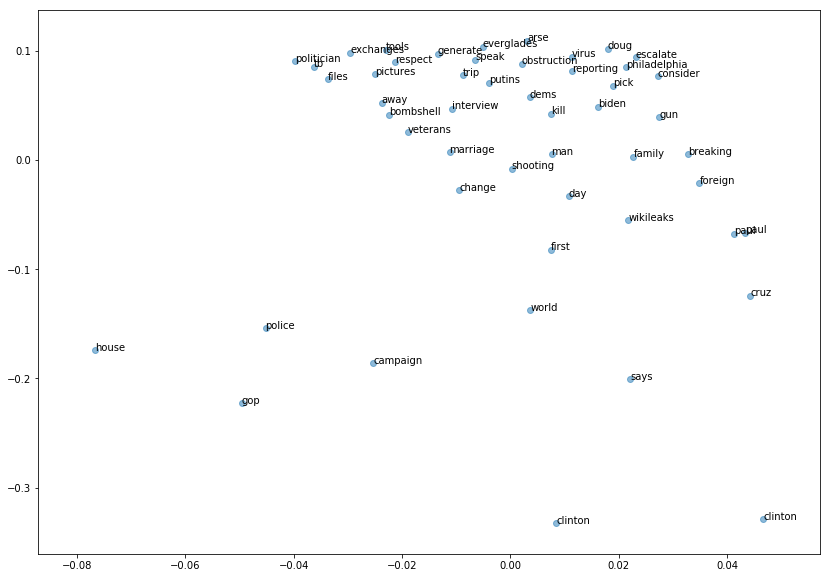

In [16]:
fig = plt.figure(figsize=(14, 10))
plt.scatter(mds[:, 0], mds[:, 1], alpha=0.5)
for i in range(mds.shape[0]):
    plt.annotate(title_tokens[rand_index[i]], (mds[i, 0], mds[i, 1]))

In [17]:
text_tokens = []
for words in cleaned_df['text']:
    text_tokens += words

In [18]:
text_vecs = np.array([wv_text.wv[word] for word in text_tokens])
## Pick 100 to visualize
rand_index = np.random.randint(0, text_vecs.shape[0], 50)
mds = MDS(n_components=2).fit_transform(text_vecs[rand_index, :])

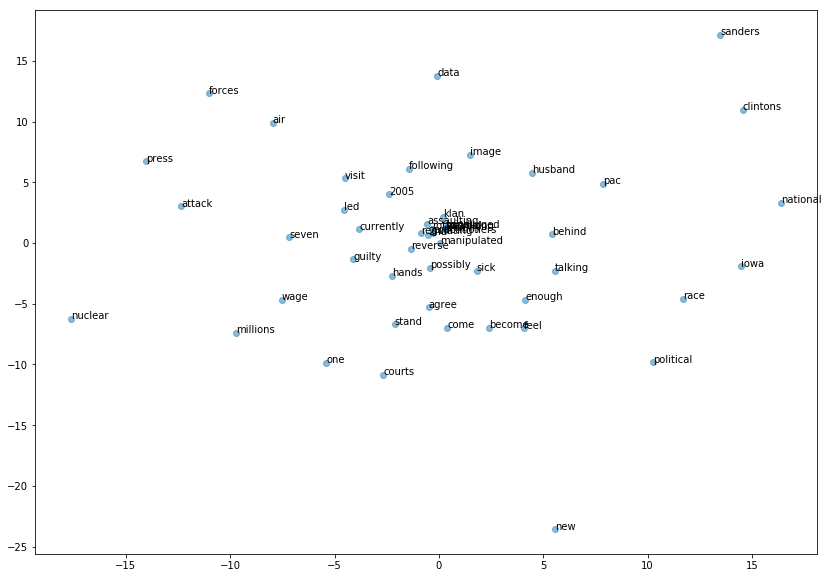

In [19]:
fig = plt.figure(figsize=(14, 10))
plt.scatter(mds[:, 0], mds[:, 1], alpha=0.5)
for i in range(mds.shape[0]):
    plt.annotate(text_tokens[rand_index[i]], (mds[i, 0], mds[i, 1]))

### 2.3 TF-IDF to get weights of each word

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [21]:
## Initialize TF-IDF models
title_vectorizer = CountVectorizer()
title_transformer = TfidfTransformer()
text_vectorizer = CountVectorizer()
text_transformer = TfidfTransformer()
tfidf_mat_title = title_transformer.fit_transform(title_vectorizer.fit_transform(
                [' '.join(words) for words in cleaned_df['title']]))
tfidf_mat_text = text_transformer.fit_transform(text_vectorizer.fit_transform(
                [' '.join(words) for words in cleaned_df['text']]))

## Map each word to its weight (TF-IDF value)
title_tokens = title_vectorizer.get_feature_names()
text_tokens = text_vectorizer.get_feature_names()
title_tfidf_score = []
text_tfidf_score = []
for i in range(len(cleaned_df['title'])):
    feature_index = tfidf_mat_title[i, :].nonzero()[1]
    tfidf_scores = dict(zip(feature_index, [tfidf_mat_title[i, x] for x in feature_index]))
    title_tfidf_score.append({title_tokens[key]: val for key, val in tfidf_scores.items()})
for i in range(len(cleaned_df['text'])):
    feature_index = tfidf_mat_text[i, :].nonzero()[1]
    tfidf_scores = dict(zip(feature_index, [tfidf_mat_text[i, x] for x in feature_index]))
    text_tfidf_score.append({text_tokens[key]: val for key, val in tfidf_scores.items()})

### 2.4 Construct the dataset

In [23]:
import numpy as np
X = np.zeros((1, 300))
y = np.array(data['label'])

In [2]:
from gensim import models
with open('./model/title_tfidf_score.json', 'r', encoding='utf8') as f:
    title_tfidf_score = json.loads(f.read())

with open('./model/text_tfidf_score.json', 'r', encoding='utf8') as f:
    text_tfidf_score = json.loads(f.read())

D:\Anaconda3_501\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
word_weighted_vec = lambda word, word_weight, wv: word_weight[word] * wv[word]
for i in range(len(cleaned_df['title'])):
    words, tfidf = list(title_tfidf_score[i].keys()), list(title_tfidf_score[i].values())
    title_vec = np.multiply(np.array(tfidf).reshape(-1, 1), np.array([wv_title[word] for word in words]))
    words, tfidf = list(text_tfidf_score[i].keys()), list(text_tfidf_score[i].values())
    text_vec = np.multiply(np.array(tfidf).reshape(-1, 1) , np.array([wv_text[word] for word in words]))
    if text_vec.shape[1] == 0:
        text_vec = np.zeros((1, 200))
    if title_vec.shape[1] == 0:
        title_vec = np.zeros((1, 100))
    doc_vec = np.column_stack((np.sum(title_vec, axis=0, keepdims=True),
                               np.sum(text_vec, axis=0, keepdims=True)))
    X = np.row_stack((X, doc_vec))
X = X[1:, :]

D:\Anaconda3_501\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
D:\Anaconda3_501\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
X.shape

In [ ]:
with open('./model/X.json', 'w', encoding='utf8') as f:
    f.write(json.dumps(X))

In [59]:
## Split into train, test and validation set
from sklearn.model_selection import train_test_split
seed = 3
## train : test : validation = 7 : 2 : 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=seed)

### 2.5 Use three kinds of Classifiers

In [77]:
def classify(X_train, y_train, X_test, models):
    for model in models:
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test).reshape(-1, 1)
        print('Model: {:>25} | Accuracy: {:.2f} | Precision: {:.2f} | Recall: {:.2f} | F1: {:.2f}'.format(
                type(model).__name__,
                metrics.accuracy_score(y_predict, y_test),
                metrics.precision_score(y_predict, y_test),
                metrics.recall_score(y_predict, y_test),
                metrics.f1_score(y_predict, y_test)
        ))

In [106]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

svc = SVC()
mlp = MLPClassifier()
rfc = RandomForestClassifier()
classify(X_train, y_train, X_test, [svc, mlp, rfc])

Model:                       SVC | Accuracy: 0.90 | Precision: 0.89 | Recall: 0.91 | F1: 0.90
Model:             MLPClassifier | Accuracy: 0.89 | Precision: 0.95 | Recall: 0.84 | F1: 0.89
Model:    RandomForestClassifier | Accuracy: 0.88 | Precision: 0.84 | Recall: 0.91 | F1: 0.87


## 3. Doc2Vec

In [3]:
from gensim.models.doc2vec import LabeledSentence
class LabeledTitle:
    def __init__(self, wordsLists):
        self.wordsLists = wordsLists
    def __iter__(self):
        for i, words in enumerate(self.wordsLists):
            yield LabeledSentence(words=words, tags=[i])
            
class LabeledText:
    def __init__(self, wordsLists):
        self.wordsLists = wordsLists
    def __iter__(self):
        for i, words in enumerate(self.wordsLists):
            yield LabeledSentence(words=words, tags=[i])

In [4]:
from gensim.models import Doc2Vec
dv_title = Doc2Vec(title_sents, alpha=0.025, min_alpha=0.025)
dv_text = Doc2Vec(alpha=0.025, min_alpha=0.025)

NameError: name 'title_sents' is not defined

In [7]:
title_sents = LabeledTitle(cleaned_df['title'])
text_sents = LabeledText(cleaned_df['text'])
max_iter = 50

In [9]:
import gensim
it_title = LabeledTitle(cleaned_df['title'])

dv_title = gensim.models.Doc2Vec(size=100, window=5, min_count=5, workers=11,alpha=0.025, min_alpha=0.025)

dv_title.build_vocab(it_title)

for epoch in range(5):
    dv_title.train(it_title, total_examples=dv_title.corpus_count, epochs=dv_title.iter)
    dv_title.alpha -= 0.002            # decrease the learning rate
    dv_title.min_alpha = dv_title.alpha       # fix the learning rate, no deca
    dv_title.train(it_title, total_examples=dv_title.corpus_count, epochs=dv_title.iter)

D:\Anaconda3_501\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  import sys


KeyboardInterrupt: 

In [60]:
dv_title.save('./model/dv_title')

In [10]:
it_text = LabeledText(cleaned_df['text'])

dv_text = gensim.models.Doc2Vec(size=200, window=5, min_count=5, workers=11,alpha=0.025, min_alpha=0.025)

dv_text.build_vocab(it_text)

for epoch in range(5):
    print(epoch)
    dv_text.train(it_text, total_examples=dv_text.corpus_count, epochs=dv_text.iter)
    dv_text.alpha -= 0.002            # decrease the learning rate
    dv_text.min_alpha = dv_text.alpha       # fix the learning rate, no deca
    dv_text.train(it_text, total_examples=dv_text.corpus_count, epochs=dv_text.iter)

D:\Anaconda3_501\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  


0
1
2
3
4


In [12]:
dv_text.save('./model/dv_text')

In [13]:
text_vecs = np.asarray(dv_text.docvecs)
# title_vecs = np.asarray(dv_title.docvecs)

In [15]:
import numpy as np
np.savetxt('./model/doc_x.txt', text_vecs)

In [65]:
text_vecs.shape, title_vecs.shape

((6335, 200), (6335, 100))

In [73]:
X = np.column_stack((title_vecs, text_vecs))
y = np.asarray(data['label'])

In [ ]:
np.savetxt('./model/y.txt', y)

In [76]:
from sklearn.model_selection import train_test_split
seed = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [84]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
svc = SVC()
mlp = MLPClassifier(hidden_layer_sizes=(50, 80, 100), max_iter=500)
rfc = RandomForestClassifier(n_estimators=20, max_depth=10)

In [85]:
classify(X_train, y_train, X_test, [svc, mlp, rfc])

Model:                       SVC | Accuracy: 0.91 | Precision: 0.89 | Recall: 0.93 | F1: 0.91
Model:             MLPClassifier | Accuracy: 0.89 | Precision: 0.87 | Recall: 0.90 | F1: 0.88
Model:    RandomForestClassifier | Accuracy: 0.83 | Precision: 0.84 | Recall: 0.82 | F1: 0.83
